# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame by merging on 'Mouse ID'
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the first few rows of the combined DataFrame
combined_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:

# Checking the number of unique mice in the combined dataset
number_of_mice = combined_data['Mouse ID'].nunique()
number_of_mice



249

In [3]:


# Finding duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mice.tolist()



['g989']

In [4]:
# Retrieving all the data for the duplicate mouse ID 'g989'
duplicate_mouse_data = combined_data[combined_data['Mouse ID'] == 'g989']
duplicate_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID 'g989'
cleaned_data = combined_data[combined_data['Mouse ID'] != 'g989']

# Display the first few rows of the cleaned DataFrame
cleaned_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of unique mice in the clean DataFrame
number_of_mice_clean = cleaned_data['Mouse ID'].nunique()
number_of_mice_clean


248

## Summary Statistics

In [7]:
# Grouping the clean data by 'Drug Regimen' and calculating summary statistics for 'Tumor Volume (mm3)'
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Renaming columns for clarity
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume SEM']

summary_stats.reset_index()


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# Using the aggregation method to produce summary statistics in a single line
advanced_summary_stats = cleaned_data.groupby('Drug Regimen').agg(
    Mean_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Median_Tumor_Volume=('Tumor Volume (mm3)', 'median'),
    Tumor_Volume_Variance=('Tumor Volume (mm3)', 'var'),
    Tumor_Volume_Std_Dev=('Tumor Volume (mm3)', 'std'),
    Tumor_Volume_SEM=('Tumor Volume (mm3)', 'sem')
)

advanced_summary_stats.reset_index()


,Drug Regimen,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

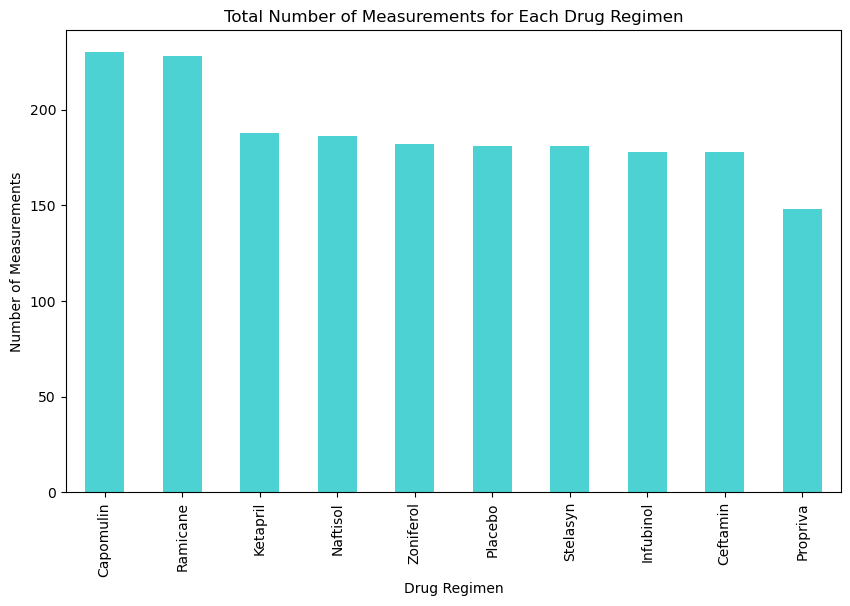

In [9]:
# Counting the total number of measurements for each drug regimen
measurements_per_regimen = cleaned_data['Drug Regimen'].value_counts()

# Generating a bar plot using Pandas
bar_plot = measurements_per_regimen.plot(kind='bar', figsize=(10,6), color='c', alpha=0.7)

# Setting the labels and title
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Measurements")
bar_plot.set_title("Total Number of Measurements for Each Drug Regimen")

# Showing the plot
plt.show()


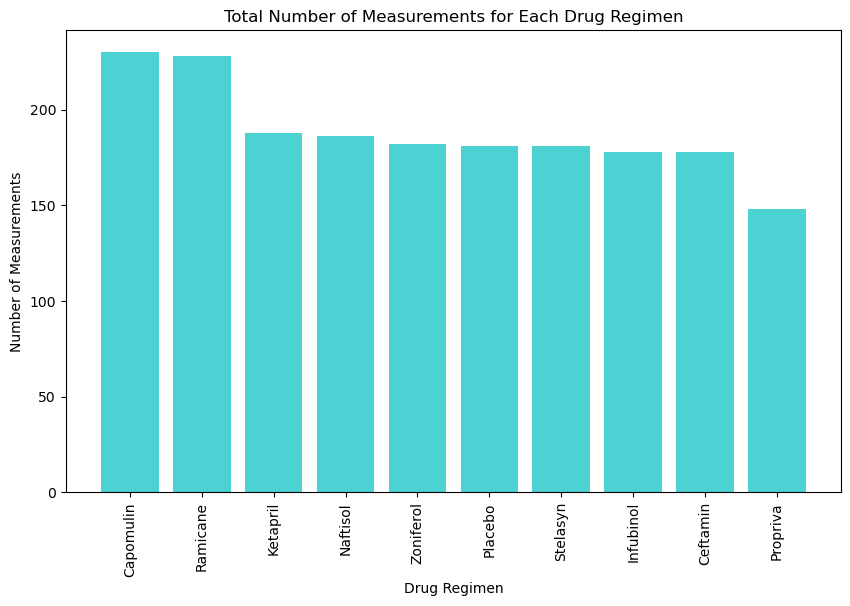

In [10]:

# Setting up the x-axis and y-axis values
x_axis = measurements_per_regimen.index.values
y_axis = measurements_per_regimen.values

# Creating the bar plot using Matplotlib's pyplot
plt.figure(figsize=(10,6))
plt.bar(x_axis, y_axis, color='c', alpha=0.7)

# Setting the labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.title("Total Number of Measurements for Each Drug Regimen")

# Adding the x-axis labels with a rotation for better readability
plt.xticks(rotation=90)

# Showing the plot
plt.show()


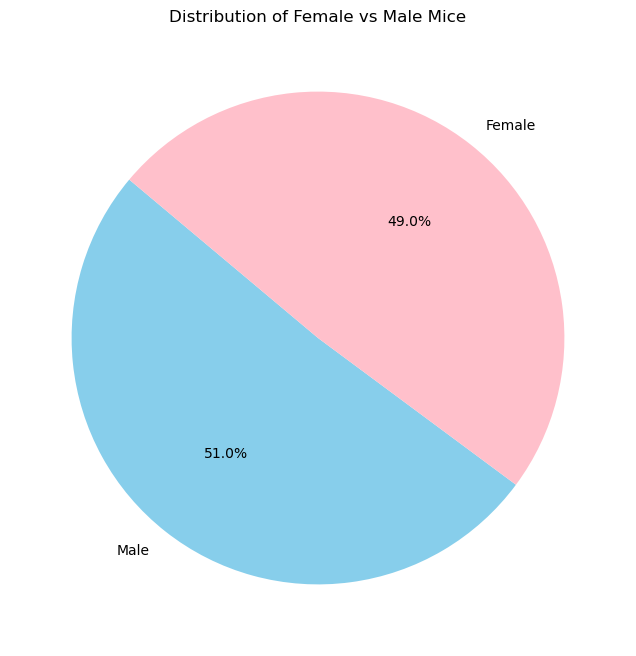

In [11]:

# Counting the number of female and male mice
gender_distribution = cleaned_data['Sex'].value_counts()

# Generating a pie plot using Pandas
pie_plot = gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'pink'], figsize=(8,8))

# Setting the title
pie_plot.set_title("Distribution of Female vs Male Mice")

# Hiding the y-axis label
pie_plot.set_ylabel('')

# Showing the plot
plt.show()



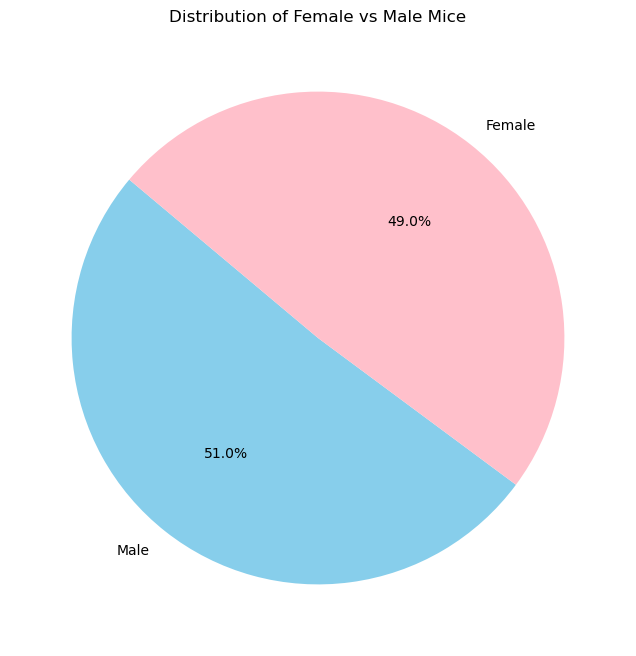

In [12]:

# Labels for the sections of our pie chart
labels = gender_distribution.index

# The values of each section of the pie chart
sizes = gender_distribution.values

# The colors of each section of the pie chart
colors = ['skyblue', 'pink']

# Creating the pie chart using pyplot
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Setting the title
plt.title("Distribution of Female vs Male Mice")

# Showing the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:

# Filtering the data for the four specific treatment regimens
specific_regimens = cleaned_data[cleaned_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Getting the last (greatest) timepoint for each mouse
last_timepoint = specific_regimens.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merging this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'])

merged_data.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [14]:

# Putting treatments into a list
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Creating an empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculating the IQR and determining potential outliers
outliers = []

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    # Adding subset to the tumor volume data list
    tumor_vol_data.append(final_tumor_vol)

    # Calculating IQR
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determining outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers.extend(final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)])

# Results
outliers_summary = {
    "Outliers": outliers,
    "Number of Outliers": len(outliers)
}
outliers_summary



{'Outliers': [36.3213458], 'Number of Outliers': 1}

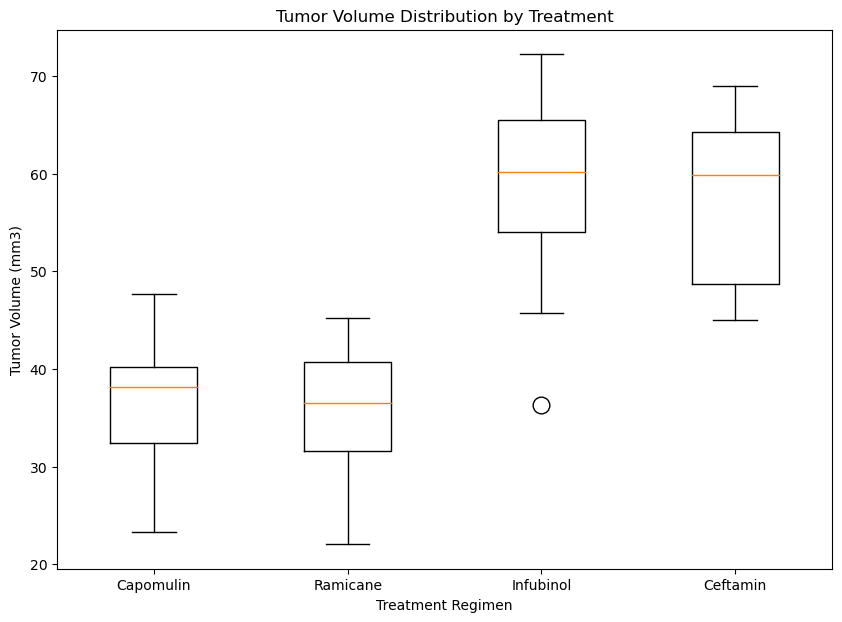

In [15]:

# Generating a box plot for the distribution of tumor volume for each treatment group
fig, ax = plt.subplots(figsize=(10, 7))
ax.boxplot(tumor_vol_data, flierprops=dict(marker='o', color='red', markersize=12))

# Adding titles and labels
ax.set_title('Tumor Volume Distribution by Treatment')
ax.set_xlabel('Treatment Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xticklabels(treatments)

# Showing the plot
plt.show()



## Line and Scatter Plots

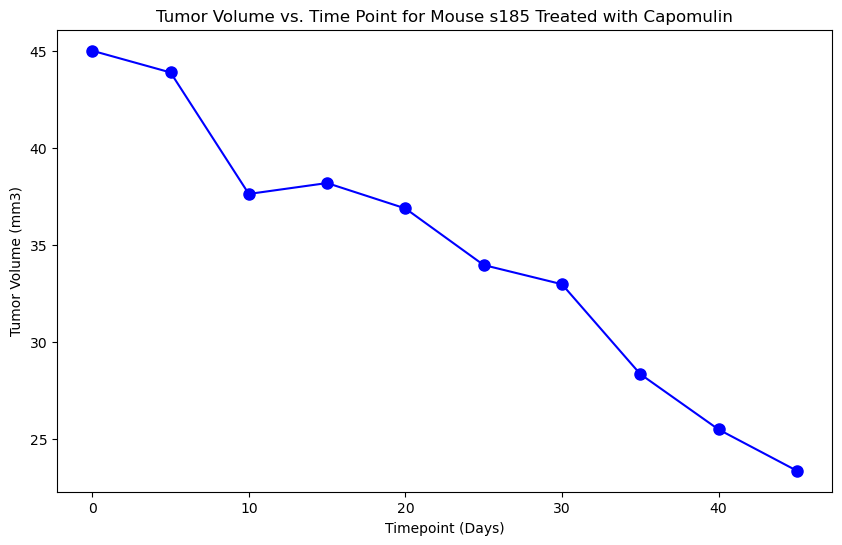

In [16]:

# Selecting a single mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
mouse_id = capomulin_data['Mouse ID'].iloc[0]

# Getting data for this mouse
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Generating a line plot for this mouse
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', color='blue', linestyle='-', markersize=8)

# Adding titles and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Showing the plot
plt.show()


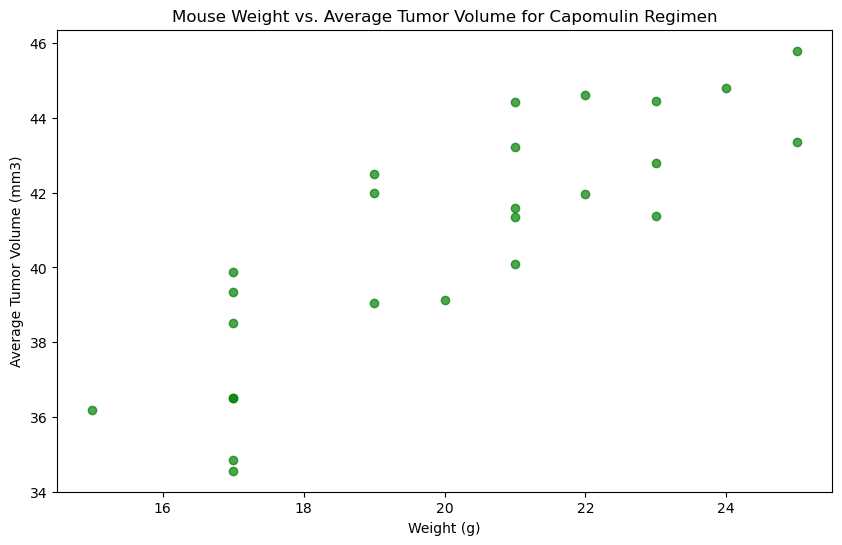

In [17]:

# Calculating the average tumor volume for each mouse treated with Capomulin
capomulin_avg = capomulin_data.groupby('Mouse ID').agg(
    Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Weight=('Weight (g)', 'mean')  # Assuming weight remains constant
)

# Generating a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg['Weight'], capomulin_avg['Average_Tumor_Volume'], color='green', alpha=0.7)

# Adding titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Showing the plot
plt.show()



## Correlation and Regression

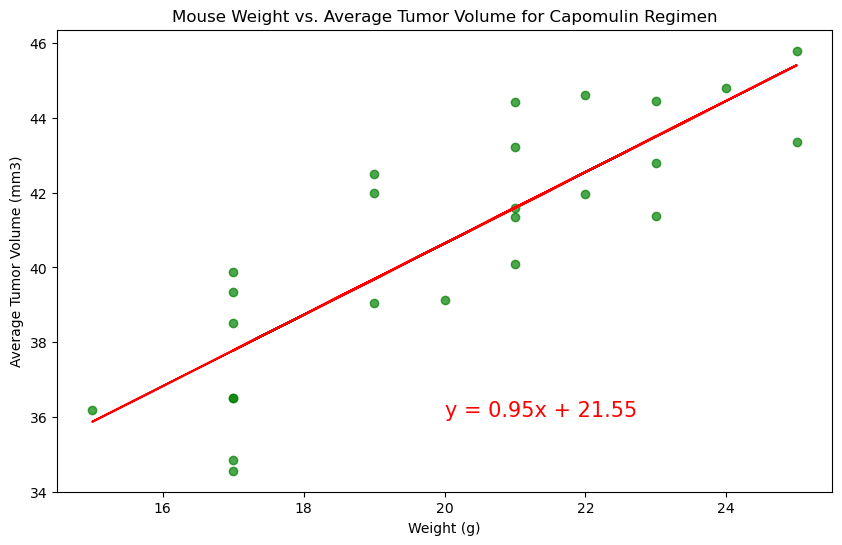

In [18]:



# Extracting the values for weight and average tumor volume
weight = capomulin_avg['Weight']
avg_tumor_volume = capomulin_avg['Average_Tumor_Volume']

# Calculating the correlation coefficient
correlation = st.pearsonr(weight, avg_tumor_volume)

# Calculating the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_volume)
regress_values = weight * slope + intercept

# Results
correlation_coefficient = correlation[0]
regression_line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

(correlation_coefficient, regression_line_eq)

# Plotting the regression line on the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(weight, avg_tumor_volume, color='green', alpha=0.7)
plt.plot(weight, regress_values, "r-")

# Adding titles, labels and the regression line equation
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(regression_line_eq, (20, 36), fontsize=15, color="red")

# Showing the plot
plt.show()

